## London Underground Traffic Patterns Before and After the Pandemic 

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
EE_2020_by_day = pd.read_csv('entries_exits_2020_by_day_NUMBAT.csv')
EE_2020_by_timeblock = pd.read_csv('entries_exits_2020_by_time_block_NUMBAT.csv')
EE_2022_by_day = pd.read_csv('entries_exits_2022_by_day_NUMBAT.csv')
EE_2022_by_timeblock = pd.read_csv('entries_exits_2022_by_time_block_NUMBAT.csv')

### Summary Statistics

In [27]:
summary_2020_by_day = EE_2020_by_day.describe()
summary_2020_by_timeblock = EE_2020_by_timeblock.describe()
summary_2022_by_day = EE_2022_by_day.describe()
summary_2022_by_timeblock = EE_2022_by_timeblock.describe()

print("2020 Entries and Exits by Day Summary:")
print(summary_2020_by_day)
print("\n2020 Entries and Exits by Time Block Summary:")
print(summary_2020_by_timeblock)
print("\n2022 Entries and Exits by Day Summary:")
print(summary_2022_by_day)
print("\n2022 Entries and Exits by Time Block Summary:")
print(summary_2022_by_timeblock)

2020 Entries and Exits by Day Summary:
               nlc  total_mon_to_thur_entries  total_friday_entries  \
count   464.000000                 464.000000            464.000000   
mean   2423.213362                3183.625000           3170.556034   
std    3015.621155                3503.830109           3503.928749   
min     500.000000                   0.000000              0.000000   
25%     616.750000                1174.750000           1173.500000   
50%     742.500000                2117.000000           2116.000000   
75%    3170.250000                3742.750000           3663.000000   
max    9587.000000               25787.000000          26275.000000   

       total_saturday_entries  total_sunday_entries  total_mon_to_thur_exits  \
count              464.000000            464.000000               464.000000   
mean              2061.756466           1432.030172              3198.355603   
std               2459.827900           1798.576622              3697.123858   
m

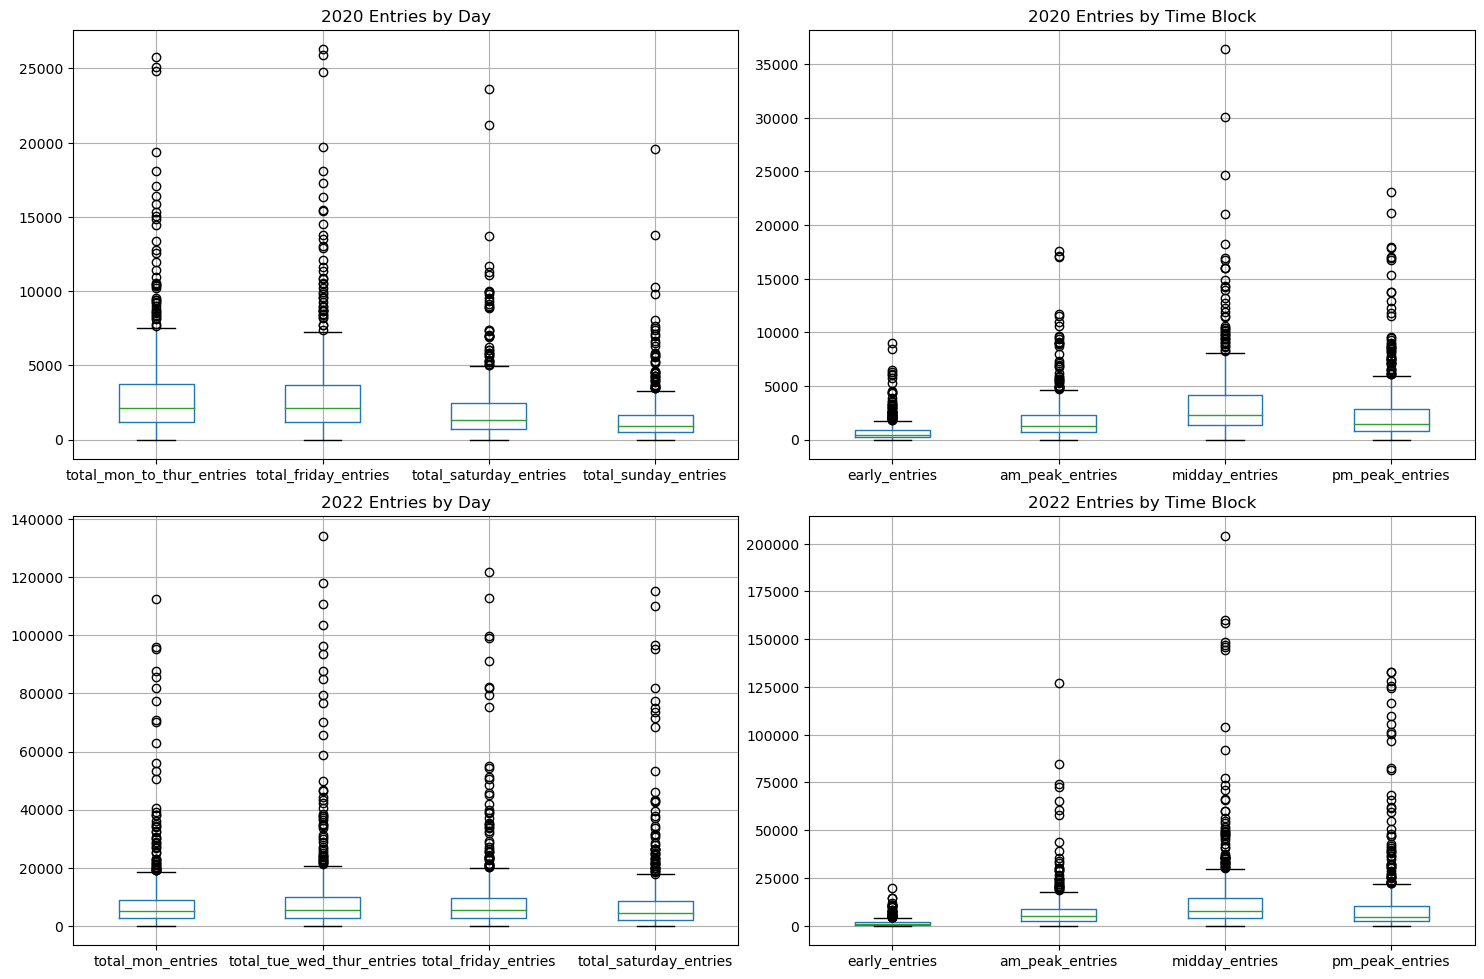

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.tight_layout(pad=2.0)

EE_2020_by_day[['total_mon_to_thur_entries', 'total_friday_entries', 'total_saturday_entries', 'total_sunday_entries']].boxplot(ax=axes[0, 0])
axes[0, 0].set_title('2020 Entries by Day')

EE_2020_by_timeblock[['early_entries', 'am_peak_entries', 'midday_entries', 'pm_peak_entries']].boxplot(ax=axes[0, 1])
axes[0, 1].set_title('2020 Entries by Time Block')

EE_2022_by_day[['total_mon_entries', 'total_tue_wed_thur_entries', 'total_friday_entries', 'total_saturday_entries']].boxplot(ax=axes[1, 0])
axes[1, 0].set_title('2022 Entries by Day')

EE_2022_by_timeblock[['early_entries', 'am_peak_entries', 'midday_entries', 'pm_peak_entries']].boxplot(ax=axes[1, 1])
axes[1, 1].set_title('2022 Entries by Time Block')

plt.show()

### Subplots showing the distribution of each dataset for each set of days and time blocks

In [30]:
time_blocks = ['early_entries', 'am_peak_entries', 'midday_entries', 'pm_peak_entries', 'evening_entries', 'late_entries']
time_blocks = ['early_entries', 'am_peak_entries', 'midday_entries', 'pm_peak_entries', 'evening_entries', 'late_entries']

averages_2020 = EE_2020_by_timeblock[time_blocks].mean()
averages_2022 = EE_2022_by_timeblock[time_blocks].mean()

percentage_changes = ((averages_2022 - averages_2020) / averages_2020) * 100
percentage_changes_df = pd.DataFrame({
    'Time Block': time_blocks,
    'Percentage Change': percentage_changes.values
})

percentage_changes_df.to_csv('percentage_changes.csv', index=False)

In [31]:
pip install circlify

Note: you may need to restart the kernel to use updated packages.


### Circular Packing Chart

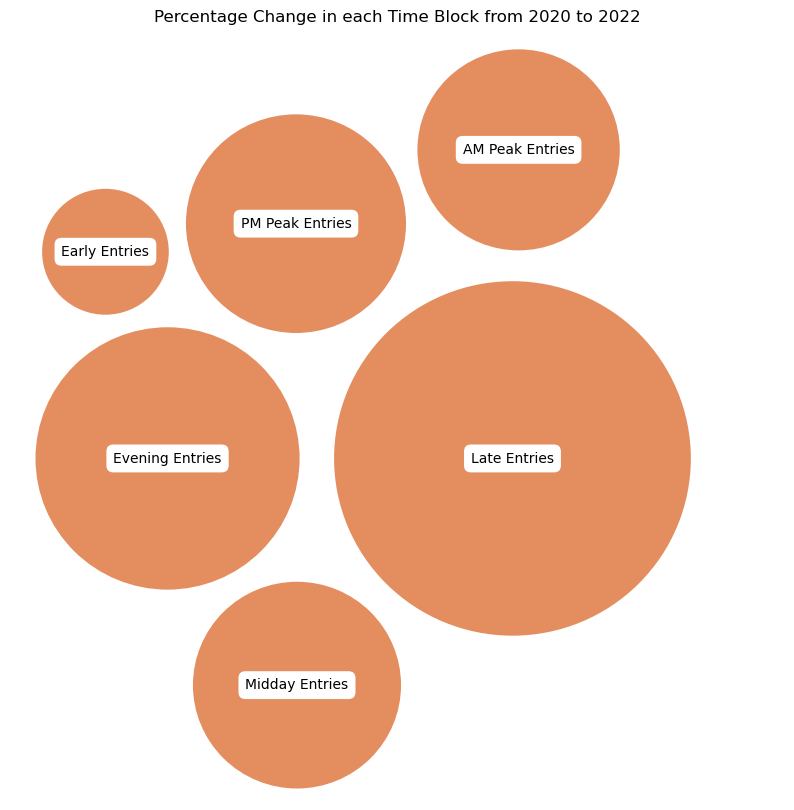

In [32]:
import circlify
df = pd.DataFrame({
    'Time Block': ['Early Entries', 'AM Peak Entries', 'Midday Entries', 'PM Peak Entries', 'Evening Entries', 'Late Entries'],
    'Percentage Change': [116, 296, 313, 350, 504, 920]
})

circles = circlify.circlify(
    df['Percentage Change'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Percentage Change in each Time Block from 2020 to 2022')
ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)


labels = df['Time Block']
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r*0.9, alpha=0.98, linewidth=2, facecolor="#e48c5c", edgecolor="None"))
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='None', boxstyle='round', pad=.5))

### Bar Chart for Weekdays and Weekends Traffic

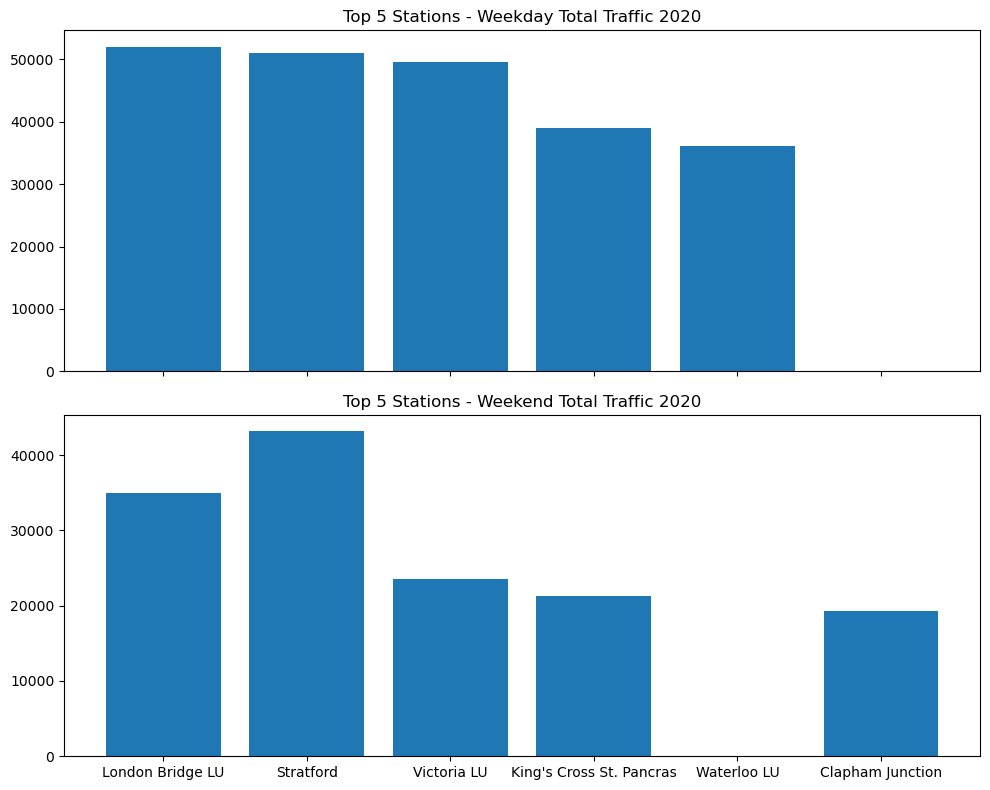

In [34]:
data_2020 = pd.read_csv('entries_exits_2020_by_day_NUMBAT.csv')
data_2022 = pd.read_csv('entries_exits_2022_by_day_NUMBAT.csv')

data_2020['weekday_total_2020'] = data_2020[['total_mon_to_thur_entries', 'total_friday_entries']].sum(axis=1)
data_2020['weekend_total_2020'] = data_2020[['total_saturday_entries', 'total_sunday_entries']].sum(axis=1)
data_2022['weekday_total_2022'] = data_2022[['total_mon_entries', 'total_tue_wed_thur_entries', 'total_friday_entries']].sum(axis=1)
data_2022['weekend_total_2022'] = data_2022[['total_saturday_entries', 'total_sunday_entries']].sum(axis=1)

top_5_weekday_2020 = data_2020.groupby('station')['weekday_total_2020'].sum().nlargest(5)
top_5_weekend_2020 = data_2020.groupby('station')['weekend_total_2020'].sum().nlargest(5)
top_5_weekday_2022 = data_2022.groupby('station')['weekday_total_2022'].sum().nlargest(5)
top_5_weekend_2022 = data_2022.groupby('station')['weekend_total_2022'].sum().nlargest(5)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].bar(top_5_weekday_2020.index, top_5_weekday_2020.values)
axs[0].set_title('Top 5 Stations - Weekday Total Traffic 2020')
axs[0].tick_params(labelbottom=False) 

axs[1].bar(top_5_weekend_2020.index, top_5_weekend_2020.values)
axs[1].set_title('Top 5 Stations - Weekend Total Traffic 2020')
axs[1].tick_params(labelrotation=0) 

plt.tight_layout()
plt.show()

### Radial Charts

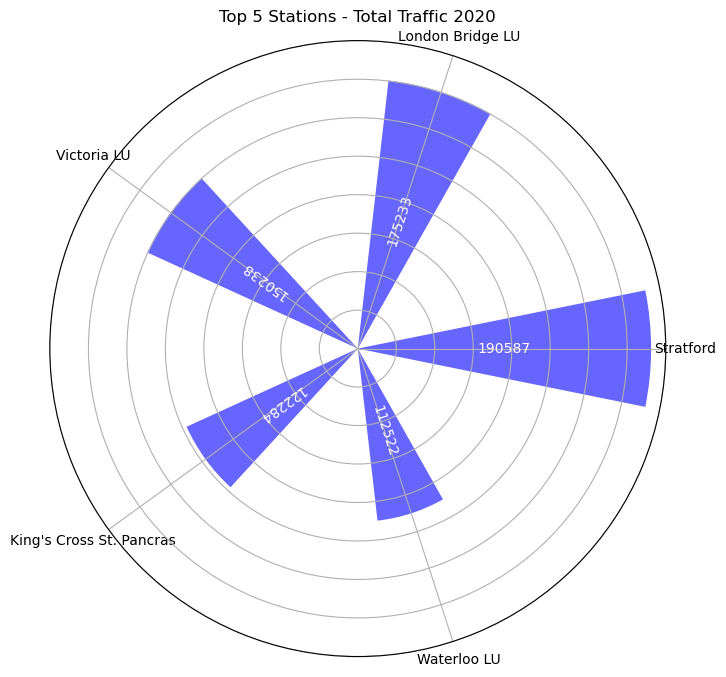

In [37]:
data_2020['total_traffic'] = data_2020.filter(like='_entries').sum(axis=1) + data_2020.filter(like='_exits').sum(axis=1)
data_2022['total_traffic'] = data_2022.filter(like='_entries').sum(axis=1) + data_2022.filter(like='_exits').sum(axis=1)

total_traffic_2020 = data_2020.groupby('station')['total_traffic'].sum()
total_traffic_2022 = data_2022.groupby('station')['total_traffic'].sum()

top_5_stations_2020 = total_traffic_2020.nlargest(5)
top_5_stations_2022 = total_traffic_2022.nlargest(5)

stations_2020 = top_5_stations_2020.index
values_2020 = top_5_stations_2020.values

angles = np.linspace(0, 2 * np.pi, len(stations_2020) + 1)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for angle, value in zip(angles[:-1], values_2020):
    ax.bar(angle, value, color='blue', alpha=0.6, width=0.4)
    rotation = np.degrees(angle)
    ax.text(angle, value / 2, str(value), color='white', ha='center', va='center', rotation=rotation)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(stations_2020)
ax.set_title('Top 5 Stations - Total Traffic 2020')

plt.show()

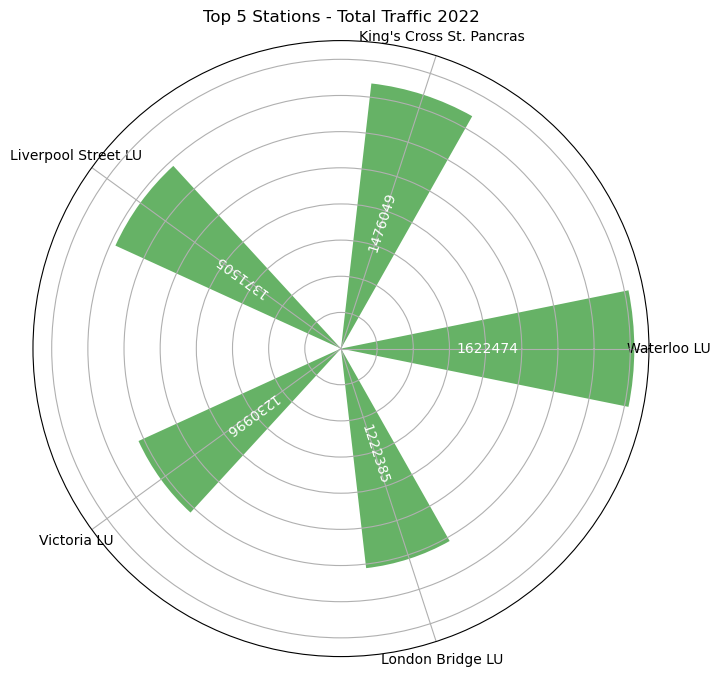

In [38]:
stations_2022 = top_5_stations_2022.index
values_2022 = top_5_stations_2022.values

angles = np.linspace(0, 2 * np.pi, len(stations_2022) + 1)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for angle, value in zip(angles[:-1], values_2022):
    ax.bar(angle, value, color='green', alpha=0.6, width=0.4)
    rotation = np.degrees(angle)
    ax.text(angle, value / 2, str(value), color='white', ha='center', va='center', rotation=rotation)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(stations_2022)
ax.set_title('Top 5 Stations - Total Traffic 2022')

plt.show()

### Bar Chart for Net Traffic by Day and Year

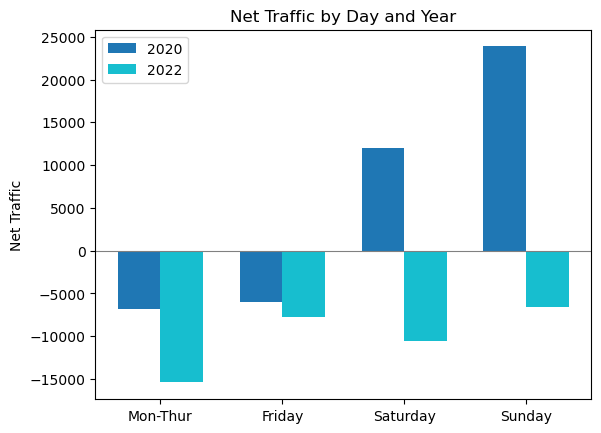

In [39]:
net_traffic_2020 = data_2020[['net_mon_to_thur', 'net_friday', 'net_saturday', 'net_sunday']].sum()
net_traffic_2022 = data_2022[['net_mon_to_thur', 'net_friday', 'net_saturday', 'net_sunday']].sum()

labels = ['Mon-Thur', 'Friday', 'Saturday', 'Sunday']
x = np.arange(len(labels)) 
width = 0.35 

colors_2020 = ['#1f77b4']
colors_2022 = ['#17becf']

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, net_traffic_2020, width, label='2020', color=colors_2020)
rects2 = ax.bar(x + width/2, net_traffic_2022, width, label='2022', color=colors_2022)

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Net Traffic')
ax.set_title('Net Traffic by Day and Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Radar Chart 

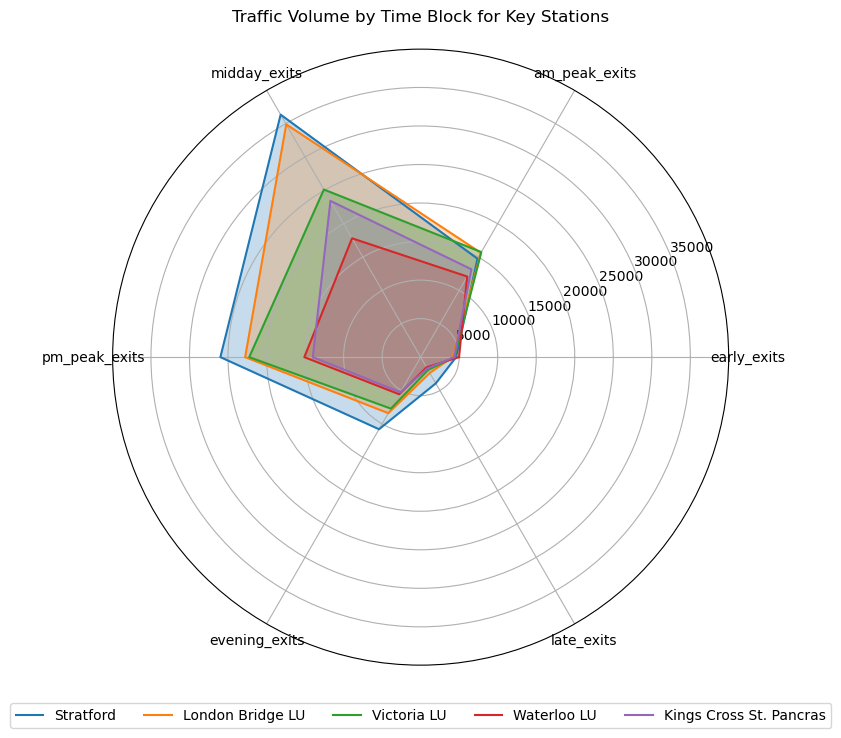

In [103]:
data = {
    'Stratford': [4604, 14754, 36339, 25990, 10804, 3932],
    'London Bridge LU': [4130, 15631, 34885, 22778, 8398, 2376],
    'Victoria LU': [4394, 15745, 25118, 22246, 7714, 1934],
    'Waterloo LU': [4983, 12084, 17808, 15099, 5565, 1525],
    'Kings Cross St. Pancras': [4346, 13168, 23413, 13997, 5262, 1705]    
}
time_blocks = ['early_exits', 'am_peak_exits', 'midday_exits', 'pm_peak_exits', 'evening_exits', 'late_exits']

df = pd.DataFrame(data, index=time_blocks)
num_vars = len(df)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for station in df.columns:
    values = df.loc[:, station].tolist()
    values += values[:1]  
    ax.plot(angles, values, label=station)
    ax.fill(angles, values, alpha=0.25)

range_scale = df.values.flatten().max()
ax.set_xticks(angles[:-1])
ax.set_xticklabels(time_blocks)
ax.set_ylim(0, range_scale + (range_scale * 0.1))  
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(df.columns))
ax.set_title('Traffic Volume by Time Block for Key Stations', pad=20)

plt.show()